<div class="alert alert-success"; style="border-left: 7px solid green">
  Описание проекта
</div>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В ходе исследования нам предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Столбцы базы данных

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_1 Загрузка данных и знакомство с нимим
</div>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display_html
from termcolor import colored
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv', sep = ',')

In [3]:
# Посмотрим случайные строки из таблицы
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9548,Ty the Tasmanian Tiger 2: Bush Rescue,GBA,2004.0,Platform,0.09,0.03,0.00,0.00,63.0,tbd,E
1248,NBA Live 98,PS,1997.0,Sports,1.41,0.06,0.00,0.04,NaN,NaN,NaN
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
4572,Big Strike Bowling,PS,2003.0,Sports,0.23,0.16,0.00,0.03,NaN,NaN,NaN
9734,O.D.T.: Escape... Or Die Trying,PS,1997.0,Adventure,0.07,0.05,0.00,0.01,NaN,NaN,NaN
11371,NHL 2K7,X360,2006.0,Sports,0.07,0.00,0.00,0.01,78.0,7.9,E10+
3149,Rayman 3D,3DS,2011.0,Platform,0.23,0.35,0.00,0.06,61.0,6.6,E
15560,Sotsugyou II: Neo Generation Special,3DO,1995.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9163,Monster House,GC,2006.0,Adventure,0.11,0.03,0.00,0.00,60.0,tbd,E10+
11600,Dungeon Travelers 2: The Royal Library & The M...,PSP,2013.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN


In [4]:
#Посмотрим список платформ
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [5]:
#Посмотрим какие жанры игр у нас используются
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [6]:
#Наконец, посмотрим, какие рейтинги ESRB у нас есть
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Согласно сайту https://www.esrb.org/ratings-guide/, можно найти следующую информацию:
 - Рейтинг E - 'everyone'
 - Рейтинг T - 'teens'
 - Рейтинг M - 'mature'
 - Рейтинг E10+ - 'everyone 10+'
 - Рейтинг EC - нет такого рейтинга
 - Рейтинг K-A - нет такого рейтинга
 - Рейтинг RP - 'not assigned final rating'
 - Рейтинг AO - нет такого рейтинга

Обрабатывать будем в следующем шаге


In [7]:
#посмотрим, типы столбцов 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Посмотрим сколько незаполненных значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# посмотрим, сколько нулей в оценках критиков и пользователей
print('Количество нулей в оценке критиков', len(df.query('Critic_Score == 0')))
print('Количество нулей в оценке пользователей', len(df.query('User_Score == "0"')))

Количество нулей в оценке критиков 0
Количество нулей в оценке пользователей 1


In [10]:
#Посмотрим количество дубликатов
df.duplicated().sum()

0

Выводы по разделу для дальнйшей обработки:
 - Дубликатов нет. Все данные - уникальные.
 - Незаполенные значения в названиях можно оставить, они ни на что не влияют (хоть их всего 2, но пусть останутся NAN)
 - Годы выпуска удалим. Во-первых, их немного, во-вторых, пропуски являются существенными, а в-третьих, непонятно, на что их заменить
 - NAN в жанрах тоже удалим. Их мало и что-то придумывать не имеет смысла, а они должны быть заполнены.
 - Оценки пользователей и оценки критиков будем заменять. На что и как - посмотрим ниже при более тщательном изучении
 - С рейтингами сложно. Несуществующие рейтинги и рейтинги NAN надо заменить. Как вариант, предлагается их заменить на рейтинг RP (рейтинг не присвоен). На сайте написано, что рейтинг RP относится к 'physical (e.g. boxed) video game'. Если мы смешаем "physical " и не "physical" игры (а непонятно, относится ли это понятие к другим играм), то мы немного запортим всего три строчки имеющегося рейтинга RP, зато не будем придумывать другие виды рейтингов
 - Необходимо изменить типы данных "User_Score " и "Year_of_Release", т.к. "User_Score" в этом формате нельзя считать, а  "Year_of_Release" нельзя использовать как дату
 

<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_2 Подготовка данных
</div>

В этом шаге:

- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
   - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишем причины, которые могли привести к пропускам;
   - Посмотрим на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишите, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [11]:
#переименование столбцов на нижний регистр
col = dict(zip(df.columns.to_list(), [item.lower() for item in df.columns.to_list()]))
df = df.rename(columns=col)

In [12]:
#посмотрим, типы столбцов количество Nan
#df.info()

In [13]:
#Подсчитаем количество незаполненных значений
#df.isna().sum()

In [14]:
#Поменять имеет типы 2 столбцов - "year_of_release" и "user_score"
#  - year_of_release надо поменять, т.к. не сравнить года будет в дальнейшем, т.к. он числовой
#  - user_score надо поменять, т.к. он текстовый, и его тоже будет не обработать. 

#По столбцу "year_of_release" 269 нулевых значений. Это меньше 2%. Это немного. Предлагается удалить, потом заменить.
#df = df[df['year_of_release'].notna()]
#df["year_of_release"] = pd.to_datetime(df["year_of_release"].astype(int).astype(str) + "-01-01")


In [15]:
#Удаление очевидных пропусков, в соответствии с выводами шага 1
df.loc[df["rating"].isin(['EC', 'K-A', 'AO']), "rating"] = 'RP'
df['rating'] = df['rating'].fillna('no_ERSB')
df = df[df['year_of_release'].notna()]
df = df[df['genre'].notna()]

In [16]:
# В оценках критиков нет нулей (проверили в шаге 1), поэтому можем смело заменить Nan на 0
df['critic_score'] = df['critic_score'].fillna(0) 

In [17]:
# В "user_score" есть значения 'tbd', nan, 0, надо подумать, что сделать с ними.
# "0" всего 1 (один). Думаю, не будет большой проблемой заменить все nan на "0"
# 'tbd' означает to be determined, to be done. Т.е рейтинг еще не определен, т.к. игру пока никто не видел. Здесь имеет смысл 
# проанализировать 'tbd' с точки зрения рейтинга, отзывов и годов выпуска игр.

print(df.query('user_score=="tbd"')['year_of_release'].unique())
print(df.query('user_score=="tbd"')['critic_score'].unique())
print(df.query('user_score=="tbd"')['rating'].unique())


#Никаких незаполненностей по другим рейтингам не обрнаружено. Вероятно, сразу не проставили рейтинг, а потом забыли.
#На мой взгляд, что TBD, что  NAN означает, что рейтинга нет и в данном случае вполне возможно заполнение нулями.
# Мы теряем только один проставленный изначально 0 в рейтинге.

[2010. 2005. 2011. 2009. 2004. 1999. 2001. 2008. 2007. 2003. 2000. 2006.
 2002. 2015. 2014. 2012. 2013. 2016. 1997.]
[ 0. 61. 71. 55. 65. 63. 37. 64. 58. 76. 54. 59. 51. 80. 74. 66. 60. 44.
 42. 73. 69. 68. 53. 75. 49. 70. 43. 46. 90. 67. 77. 78. 62. 89. 81. 47.
 56. 52. 34. 45. 72. 86. 57. 82. 26. 50. 84. 48. 36. 41. 33. 39. 79. 85.
 83. 87. 40. 38. 88. 35. 32. 28. 27. 31. 30. 23.]
['E' 'E10+' 'T' 'no_ERSB' 'M' 'RP']


In [18]:
# Заменим TBD
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [19]:
df['user_score'] = df['user_score'].astype(float)

In [20]:
#Еще раз проверим, что 0 только один
df.query('user_score ==0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,0.0,0.0,E


In [21]:
df['user_score'] = df['user_score'].fillna(0)

In [22]:
temp = df.copy()

#заменим тип "year_of_release"
df["year_of_release"] = pd.to_datetime(df["year_of_release"].astype(int).astype(str) + "-01-01")

In [23]:
temp["year_of_release"] = pd.to_datetime(temp["year_of_release"].astype(int))

# При моем способе (может, не самый удачный, но по-другому не знаю как)
print('Мой способ',df["year_of_release"][500])
print('Способ без str', temp["year_of_release"][500])

Мой способ 2001-01-01 00:00:00
Способ без str 1970-01-01 00:00:00.000002001


In [24]:
# Комментарий ревьюера 2
df_temp = pd.read_csv('/datasets/games.csv', sep = ',')
df_temp.columns = df_temp.columns.str.lower()
df_temp = df_temp.dropna(subset = ['year_of_release'])
df_temp['year_of_release'] = df_temp['year_of_release'].astype('int')
print('А мой способ лучше:',df_temp["year_of_release"][500])

А мой способ лучше: 2001


In [25]:
# Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     16444 non-null  float64       
 9   user_score       16444 non-null  float64       
 10  rating           16444 non-null  object        
 11  sum_sales        16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 2.1+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " 

<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_3 Исследовательский анализ данных
</div>

В этом шаге мы попытаемся сделать следующее:

- Посмотрим, сколько игр выпускалось в разные годы. Определимся, важны ли данные за все периоды.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Попробуем выяснить, за какой характерный срок появляются новые и исчезают старые платформы.
- Возьмем данные за соответствующий актуальный период. Актуальный период попытаемся определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Без учета в работе данные за предыдущие годы.
 - Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
 - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.
 - Соотнесем выводы с продажами игр на других платформах.
 - Посмотрим на общее распределение игр по жанрам. Посмотрим, что можно сказать о самых прибыльных жанрах. Определим, выделяются ли жанры с высокими и низкими продажами.

In [27]:
def yy(t):
    return pd.to_datetime(t).year

<AxesSubplot:title={'center':'Динамика разработки игр'}, xlabel='Годы выпуска'>

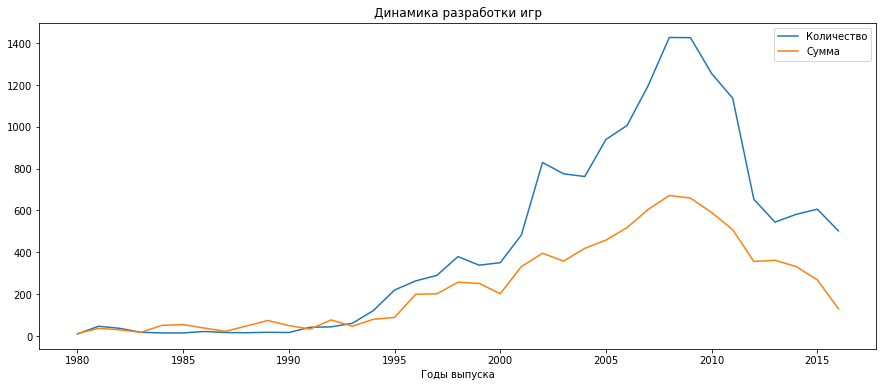

In [28]:
# Количество выпущенных игр за разные годы в числовом и стоимостном выражении
df.pivot_table(index = df['year_of_release'].apply(yy), values = 'sum_sales',  aggfunc=['count', 'sum'] ).set_axis(['Количество', 'Сумма'], axis=1).plot(figsize=(15,6), title = 'Динамика разработки игр', xlabel = 'Годы выпуска')

<AxesSubplot:title={'center':'Средняя стоимость игр по годам'}, xlabel='Годы выпуска', ylabel='цена ед.'>

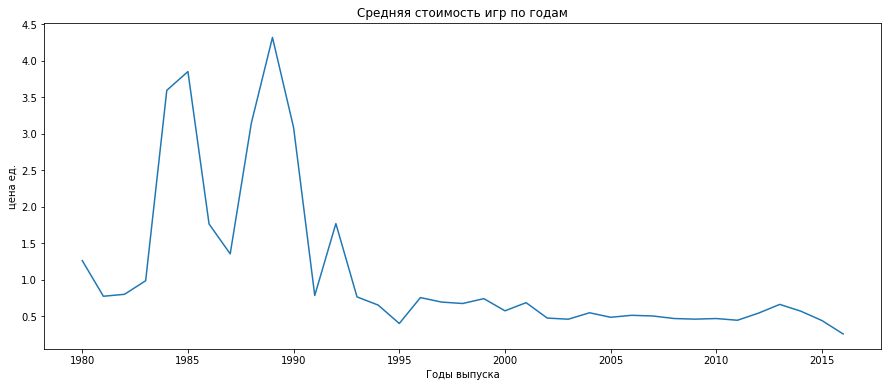

In [29]:
# Посмотрим среднюю стоимость компьютерной игры
agg_table = df.pivot_table(index = df['year_of_release'].apply(yy), values = 'sum_sales',  aggfunc=['count', 'sum']).set_axis(['count', 'sum'], axis=1)
agg_table['cost'] = agg_table['sum'] / agg_table['count']
agg_table['cost'].plot(figsize=(15,6), title = 'Средняя стоимость игр по годам', xlabel = 'Годы выпуска', ylabel = 'цена ед.')

In [30]:
# посмотрим процент игр до 1992 года
(len(df[df['year_of_release'].apply(yy)<=1992])/len(df))

0.01854779858915106

Вывод: 
 - На заре развития разработки компьютерных игр это был узкий сегмент рынка. Игр мало, денег мало. С ростом количества разработок выручка росла не такими темпами, хоть и повторяла кривую роста. Своего пика этот сегмент достиг в 2010-х годах, сейчас идет стремительное падение рынка, вернувшись к показателям 2000-х.
 - Средняя стоимость компьютерной игры с 1992 года находится вотносительном равновесии.
 - В дальнейшем нас могут не интересовать игры, разработанные до 1992 года, т.к. их мало (1,8% от всех игр) и средняя стоимость значительно выбивается из общей картины, однако для просмотра динамики развиятия рынка игр по годам данные могут быть существенными. Таким образом, избавляться от данных не будем, но для различных нужд можно будет использовать разные срезы 

<AxesSubplot:xlabel='platform'>

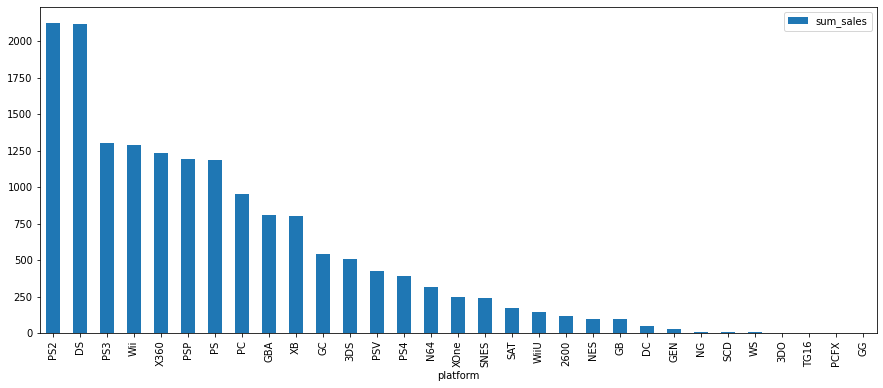

In [31]:
# посмотрим количество продаж игр по платформам по количеству
df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['count']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).plot(kind = 'bar', figsize = (15,6))

<AxesSubplot:xlabel='platform'>

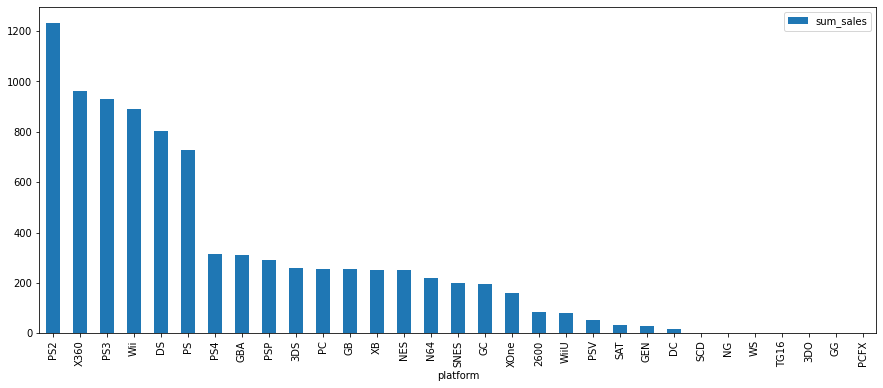

In [32]:
# посмотрим количество продаж игр по платформам по суммам
df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['sum']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).plot(kind = 'bar', figsize = (15,6))

In [33]:
#Из графика видно, что первые 6 платформ лидируют. Сформируем 6 основных платформ по суммам
six_first = df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['sum']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).reset_index().rename_axis(None, axis=1).head(6)['platform']

#Посмотрим с какого года начиналась деятельность компаний
print('Годы начала', list(map(lambda x: sorted(df[df['platform']==x]['year_of_release'].apply(yy).unique())[0], six_first)))

#Посмотрим, сколько значений меньше 1995 года, и сильно ли они повлияют на результат. 
len(df.query('platform in @six_first & year_of_release<1995'))
# Их 18. Уберем. Меньше 2000 года уже 917. Это много. Гранцу сделаем 1995 года 

#посмотрим процент выручки первых 6 компаний
print('Процент выручки', df.query('platform in @six_first')['sum_sales'].sum()/df['sum_sales'].sum())

#Исходя из того, что процент выручки первых 6 компаний превышает 60%, будем считать эти платформы типовыми.


Годы начала [2000, 2005, 2006, 2006, 1985, 1994]
Процент выручки 0.6293904158777089


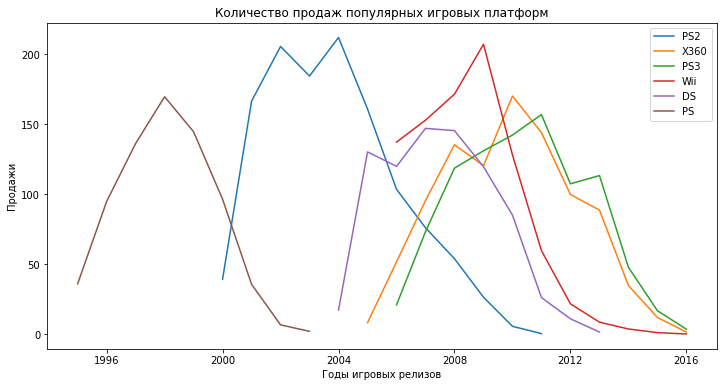

In [34]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in six_first:
    total = df.query('platform ==@i & year_of_release>=1995').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    sns.lineplot(data=total['sum_sales'], label=i)
    plt.legend()

Вывод:
- Мы посмотрели 6 основных платформ за период с 1995 года. Из графика видно, что практически все платформы сущеcтвуют около 10 лет. Развитие платформ происходит одинаково вне зависимости от того, разрабатывалсь ли платформа до 2000 года или позже.
- Больше всего продаж у PS2, PS3 и X360
- Около 4 лет уходит у платформы, чтобы достичь пика
- В качестве базы для прогноза 2017 года можно считать данные за 2013-2016 годы. Выбор объясняется следующим: полных три года и 2016 "AsIs"

In [35]:
#Выберем актуальный период для дальнейшего анализа
df_actual = df.query('year_of_release>=2013')

<AxesSubplot:xlabel='platform'>

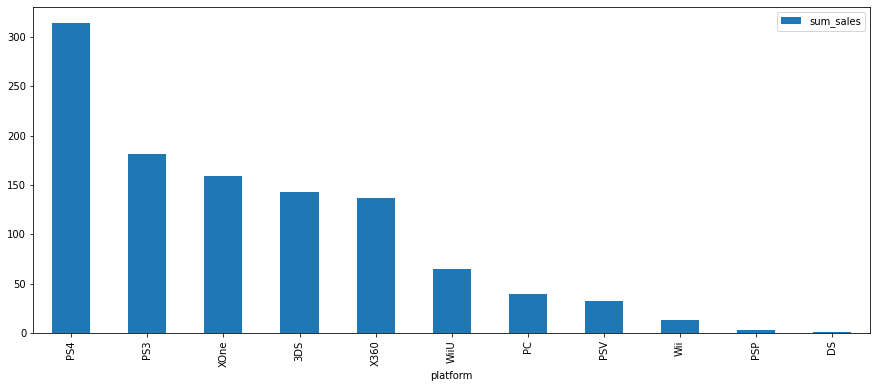

In [36]:
# Определим самые продаваемые платформы за период

df_actual.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['sum']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).plot(kind = 'bar', figsize = (15,6))

In [37]:
#посмотрим ради интереса, сколько объема продаж занимают первые 3 места

first = list(df_actual.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['sum']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).reset_index().rename_axis(None, axis=1).head(3)['platform'])
print('Процент выручки за 2015-2016гг', round(df_actual.query('platform in @first')['sum_sales'].sum()/df_actual['sum_sales'].sum()*100, 2), '%, платформы - лидеры', first)

Процент выручки за 2015-2016гг 60.04 %, платформы - лидеры ['PS4', 'PS3', 'XOne']


(0.0, 1.5)

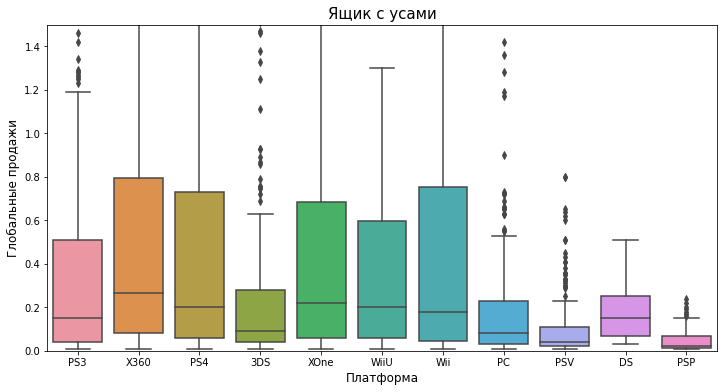

In [38]:
#Построим ящик с усами
plt.figure(figsize=(12,6))
sns.boxplot(data=df_actual, x='platform', y='sum_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim([-0,1.5])

In [39]:
#Попробуем разобраться, чем вызваны выбросы
for i in list(df_actual['platform'].unique()): 
    print('Платформа', i, 'кол-во игр', df_actual.query('platform==@i')['name'].nunique())
  

Платформа PS3 кол-во игр 345
Платформа X360 кол-во игр 186
Платформа PS4 кол-во игр 392
Платформа 3DS кол-во игр 303
Платформа XOne кол-во игр 247
Платформа WiiU кол-во игр 115
Платформа Wii кол-во игр 23
Платформа PC кол-во игр 189
Платформа PSV кол-во игр 358
Платформа DS кол-во игр 8
Платформа PSP кол-во игр 67


Вывод:
 - Медианная продажа у нескольких платформ одинаковая.
 - Прослеживаются 2 стратегии платформа:
   1. Выпускать много игр, где что-то "выстреливает", что-то нет. При правильном подходе общие продажи значительные. 
   2. Выпускать мало игр, где тщательно все продумыать, при этом подходе медианная стоимость велика, но общие продажи - малы.

In [40]:
# Комментарий ревьюера
'''🛠 Для анализа не выбран актуальный период.'''
df.year_of_release.min()

Timestamp('1980-01-01 00:00:00')

In [41]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
# Выберем PS4, как самую популярную платформу. 
#Нулевые рейтинги не будем рассматтривать, т.к. это заглушки.
ps4 = list(first)[0]
df_actual.query('platform==@ps4&user_score!=0')['sum_sales'].corr(df_actual.query('platform==@ps4&user_score!=0')['user_score'])

-0.031957110204556376

In [42]:
df_actual.query('platform==@ps4&critic_score!=0')['sum_sales'].corr(df_actual.query('platform==@ps4&critic_score!=0')['critic_score'])

0.406567902061781

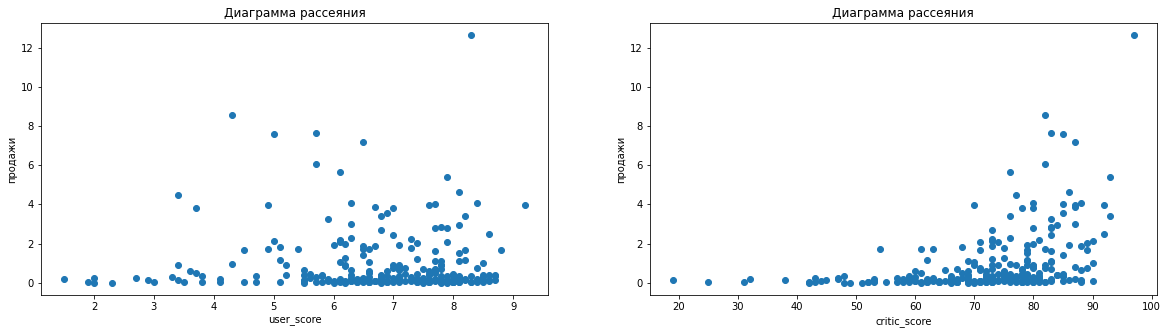

In [43]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].scatter(df_actual.query('platform==@ps4&user_score!=0')['user_score'], df_actual.query('platform==@ps4&user_score!=0')['sum_sales'])
ax[1].scatter(df_actual.query('platform==@ps4&critic_score!=0')['critic_score'], df_actual.query('platform==@ps4&critic_score!=0')['sum_sales'])
ax[0].set_xlabel("user_score")
ax[0].set_ylabel("продажи")

ax[0].set_title('Диаграмма рассеяния')
ax[1].set_title('Диаграмма рассеяния')
ax[1].set_xlabel("critic_score")
ax[1].set_ylabel("продажи")

                  
plt.show()

Вывод по платформе PS2:
Корреляция - 0,059 и 0,43 - весьма незначительная. Оценки пльзователей вообще не влияют на проджажи, оценки экспертов умеренно влияют на продажи.

In [44]:
# Построим и оценим корреляцию по всем платформам
# Применим шкалу Чеддока для оценки корреляции
# 0,1-0,3 слабая; 0,3-0,5 умеренная; 0,5-0,7 заметная; 0,7-0,9 высокая; 0,9-0,99 весьма высокая

def measure_corr(t):
    if abs(t) ==0:
        a = 'Корреляции нет'
    elif abs(t)<0.1:
        a = 'Корреляция очень слабая'
    elif 0.1<=abs(t)<0.3:
        a = 'Корреляция слабая'
    elif 0.3<=abs(t)<0.5:    
        a = 'Корреляция умеренная'
    elif 0.5<=abs(t)<0.7:    
        a = 'Корреляция заметная'
    elif 0.7<=abs(t)<0.9:    
        a = 'Корреляция высокая'
    else:
        a = 'Корреляция весьма высокая'
    return a 

d_cor = pd.DataFrame()
t = list(df_actual['platform'].unique())

for i in t:
    user_len = len(df_actual.query('platform==@i&user_score!=0'))
    critic_len = len(df_actual.query('platform==@i&critic_score!=0'))
    
    if (user_len ==0) or (user_len ==1): 
        d_cor.loc[i,'user_score'] = 0
        d_cor.loc[i,'Кол-во user_score'] = user_len
    else:
        d_cor.loc[i,'user_score'] = df_actual.query('platform==@i&user_score!=0')['sum_sales'].corr(df_actual.query('platform==@i&user_score!=0')['user_score'])    
        d_cor.loc[i,'Кол-во user_score'] = user_len
    if (critic_len ==0) or (critic_len ==1):
        d_cor.loc[i,'critic_score'] = 0
        d_cor.loc[i,'Кол-во critic_score'] = critic_len
    else:    
        d_cor.loc[i,'critic_score'] = df_actual.query('platform==@i&critic_score!=0')['sum_sales'].corr(df_actual.query('platform==@i&critic_score!=0')['critic_score'])    
        d_cor.loc[i,'Кол-во critic_score'] = critic_len
        
d_cor['Оценка user_score'] = d_cor['user_score'].apply(measure_corr)
d_cor['Оценка critic_score'] = d_cor['critic_score'].apply(measure_corr)

In [45]:
d_cor

,user_score,Кол-во user_score,critic_score,Кол-во critic_score,Оценка user_score,Оценка critic_score
PS3,0.002394,186.0,0.334285,121.0,Корреляция очень слабая,Корреляция умеренная
X360,-0.011742,143.0,0.350345,81.0,Корреляция очень слабая,Корреляция умеренная
PS4,-0.031957,257.0,0.406568,252.0,Корреляция очень слабая,Корреляция умеренная
3DS,0.241504,80.0,0.357057,71.0,Корреляция слабая,Корреляция умеренная
XOne,-0.068925,182.0,0.416998,169.0,Корреляция очень слабая,Корреляция умеренная
WiiU,0.419330,80.0,0.376415,70.0,Корреляция умеренная,Корреляция умеренная
Wii,0.682942,7.0,0.000000,0.0,Корреляция заметная,Корреляции нет
PC,-0.093842,155.0,0.196030,149.0,Корреляция очень слабая,Корреляция слабая
PSV,0.000942,99.0,0.254742,77.0,Корреляция очень слабая,Корреляция слабая
DS,0.000000,1.0,0.000000,0.0,Корреляции нет,Корреляции нет


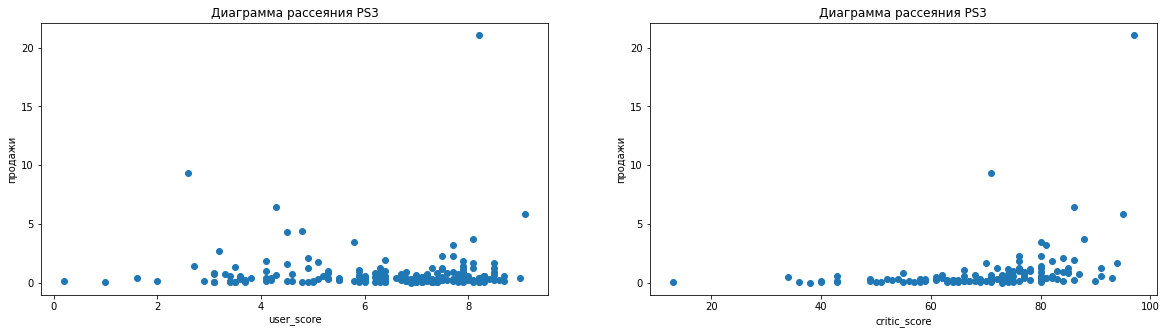

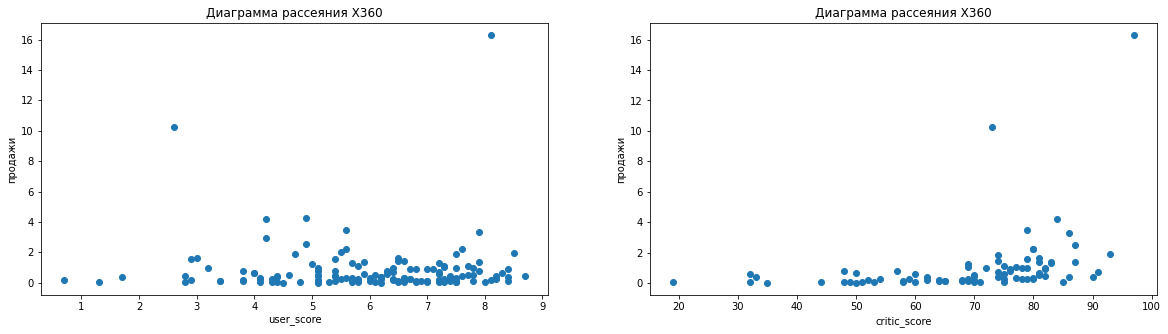

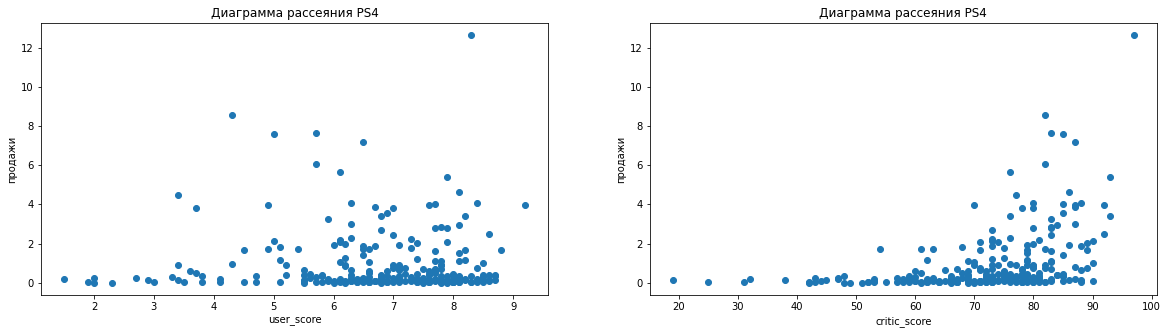

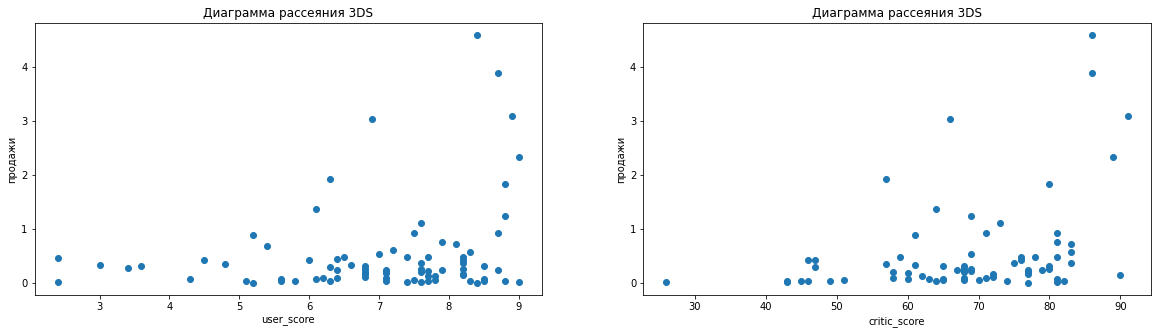

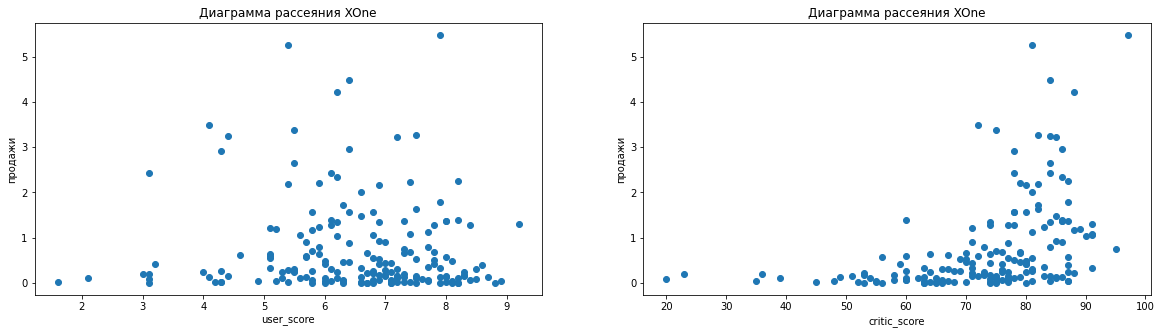

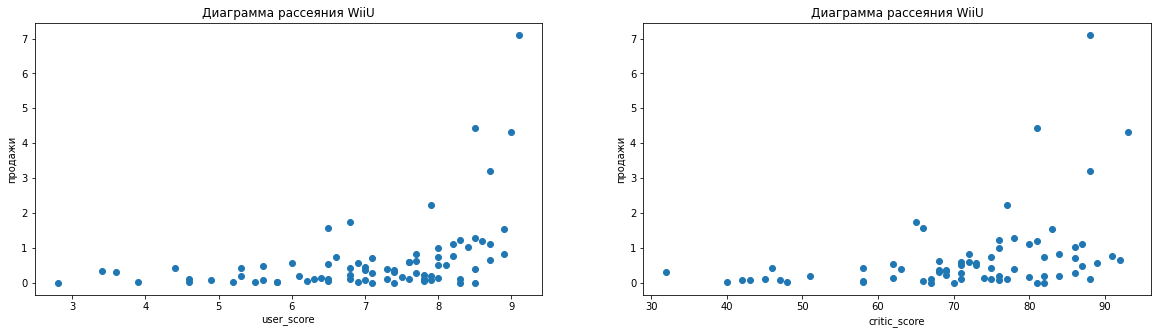

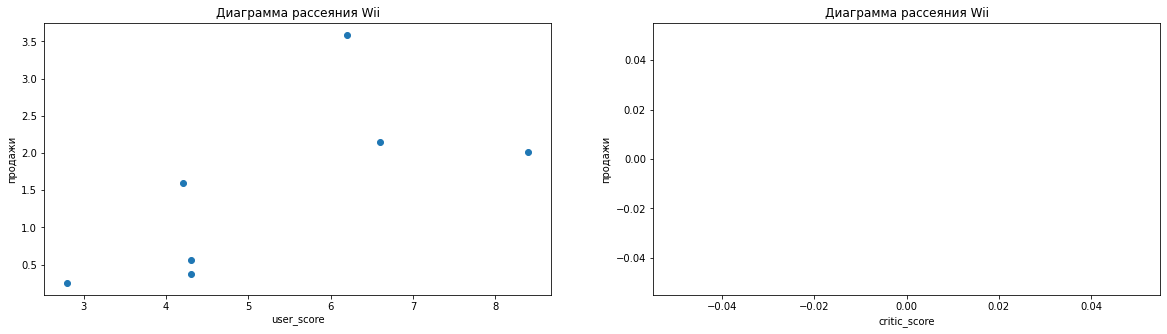

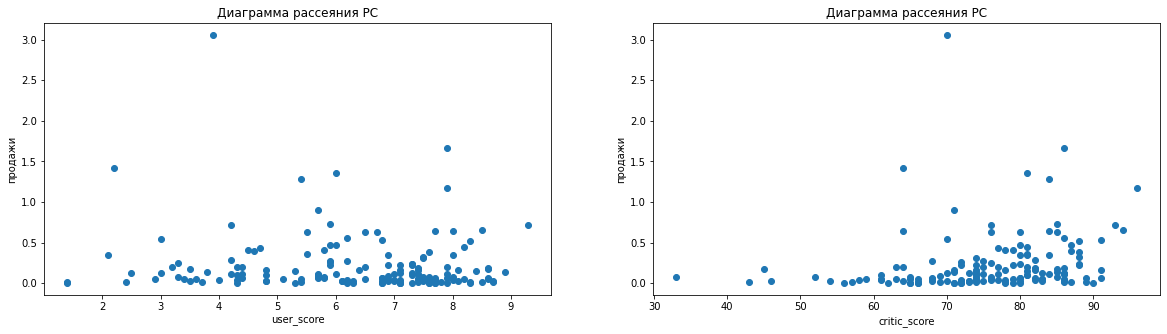

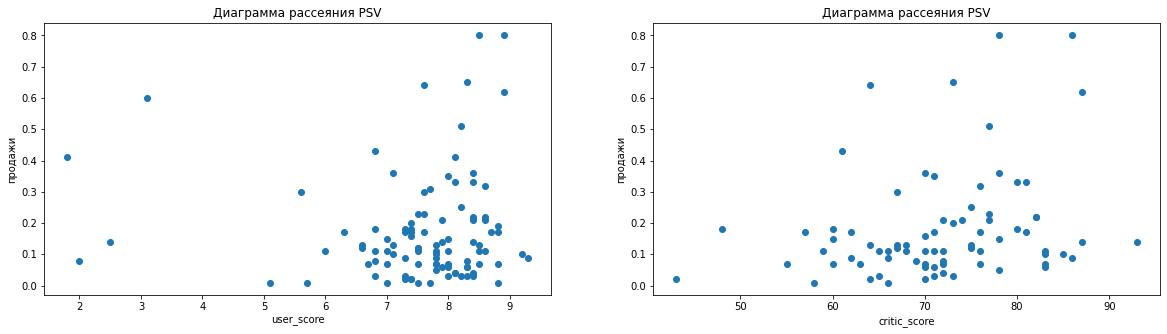

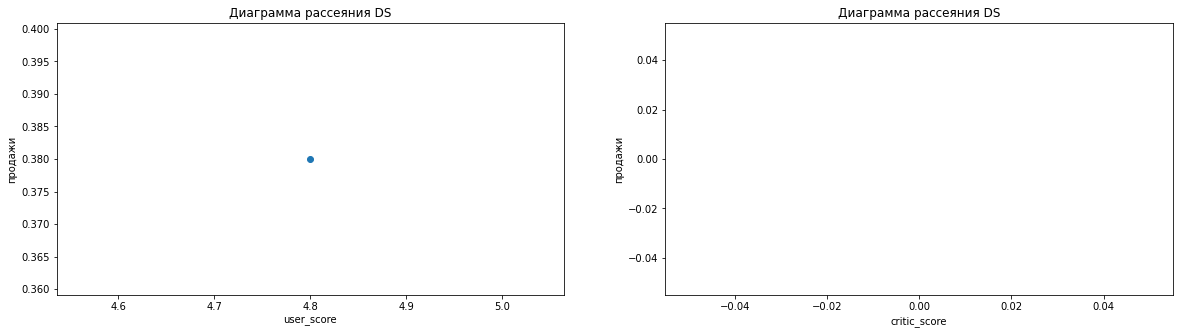

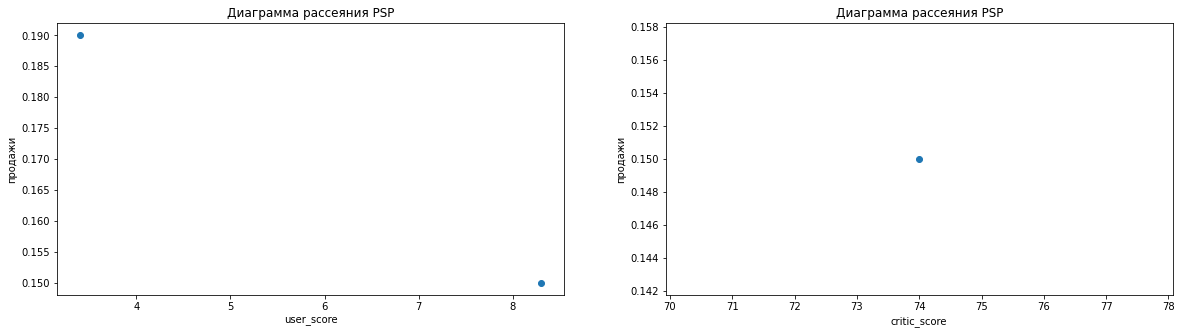

In [46]:
# Сфомируем графики рассеяния
for i in list(df_actual['platform'].unique()):
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    ax[0].scatter(df_actual.query('platform==@i&user_score!=0')['user_score'], df_actual.query('platform==@i&user_score!=0')['sum_sales'])
    ax[1].scatter(df_actual.query('platform==@i&critic_score!=0')['critic_score'], df_actual.query('platform==@i&critic_score!=0')['sum_sales'])
    ax[0].set_xlabel("user_score")
    ax[0].set_ylabel("продажи")
 
    
    ax[0].set_title('Диаграмма рассеяния '+i)
    ax[1].set_title('Диаграмма рассеяния '+i)
    ax[1].set_xlabel("critic_score")
    ax[1].set_ylabel("продажи")

                  
plt.show()

Выводы:
- Однозначно определить влияние на все платформ за 2013-2016 гг оценок критиков и пользователей не получилось, т.к. не по всем платформам присутствуют оценки. Однако, там, где они проставлены, влияние критиков умеренное, а пользовательские оценки не влияют на продажи.
- По платформам, формирующим 85% продаж - 'PS4', 'PS3', 'XOne', '3DS', 'X360', оценки критиков умеренно влияли на продажи.


In [47]:
#Посчитаем дисперсию и стандартное отлонение по оценкам пользователей и критиков
#Предполагаем, что если оценка 0 (замененное nan), то это означает, что оценки не было. Поэтому такие данные будут только 
#искажать картину. Оценки будем смотреть без учета нулевых значений/

#Картину сформируем по первым 5 лидерам рынка (около 90% за 2013-2016гг). По остальным в той или иной степени отсутствуюит оценки
first = list(df_actual.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['sum']).set_axis(['sum_sales'], axis=1).sort_values('sum_sales', ascending = False).reset_index().rename_axis(None, axis=1).head(5)['platform'])
print('Процент выручки за 2013-2016гг', round(df_actual.query('platform in @first')['sum_sales'].sum()/df_actual['sum_sales'].sum()*100, 2), '%, платформы - лидеры', first)


stat_table = pd.DataFrame()
n = 0

for elem in ['user_score', 'critic_score']:
    for i in first:    
        rr = str('platform==@i&' + elem + '!=0')
        
        stat_table.loc[n, 'Платформа'] = i
        stat_table.loc[n, 'Вид оценки'] = elem
        stat_table.loc[n, 'Дисперсия'] = np.var(df_actual.query(rr)[elem])
        stat_table.loc[n, 'Стд откл'] = np.std(df_actual.query(rr)[elem])
        stat_table.loc[n, 'Среднее'] = np.mean(df_actual.query(rr)[elem])
        stat_table.loc[n, 'Медиана'] = np.median(df_actual.query(rr)[elem])
        n+=1
stat_table

Процент выручки за 2013-2016гг 85.72 %, платформы - лидеры ['PS4', 'PS3', 'XOne', '3DS', 'X360']


,Платформа,Вид оценки,Дисперсия,Стд откл,Среднее,Медиана
0,PS4,user_score,2.121797,1.456639,6.748249,7.0
1,PS3,user_score,3.212067,1.792224,6.348387,6.9
2,XOne,user_score,1.896519,1.377142,6.521429,6.8
3,3DS,user_score,2.338561,1.529235,6.976250,7.3
4,X360,user_score,2.586385,1.608224,5.993007,6.2
5,PS4,critic_score,155.281352,12.461194,72.091270,73.0
6,PS3,critic_score,203.630080,14.269901,70.198347,73.0
7,XOne,critic_score,166.799412,12.915085,73.325444,76.0
8,3DS,critic_score,169.012498,13.000481,68.338028,69.0
9,X360,critic_score,237.710410,15.417860,69.234568,74.0


Выводы из статистического анализа:
 - Видно, что пользователями и критиками применялась разная шкала оценки (подозреваю, что 10-балльная и 100-балльная)
 - Наблюдается большой разброс оценок и критиков, и пользователей по платформам PS4 и XOne, что, очевидно, объяснятеся количеством выпускаемых игр. 

In [48]:
# Комментарий ревьюера
'''🛠 Для анализа не выбран актуальный период.'''
df.year_of_release.min()

Timestamp('1980-01-01 00:00:00')

In [49]:
#Распределение игр по жанрам
genres = df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
genres= genres.reset_index().rename_axis(None, axis=1)
genres

,genre,sum_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи')

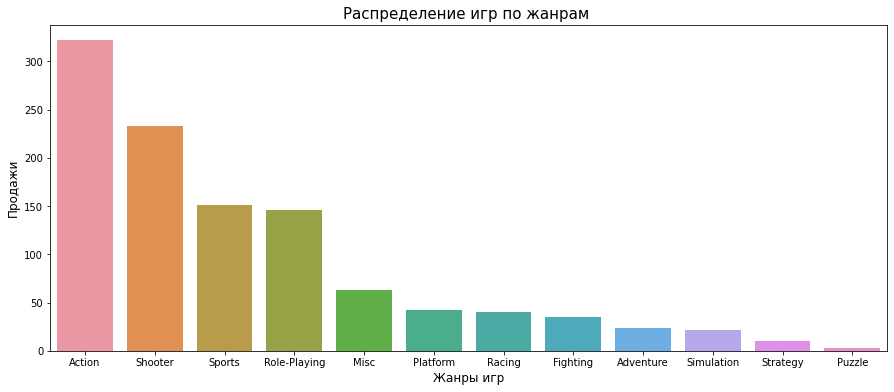

In [50]:
plt.figure(figsize=(15,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genres, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

In [51]:
def group_ind(data, spis):
    if data in spis:
        t = data
    else:
        t = 'others'  
    return t

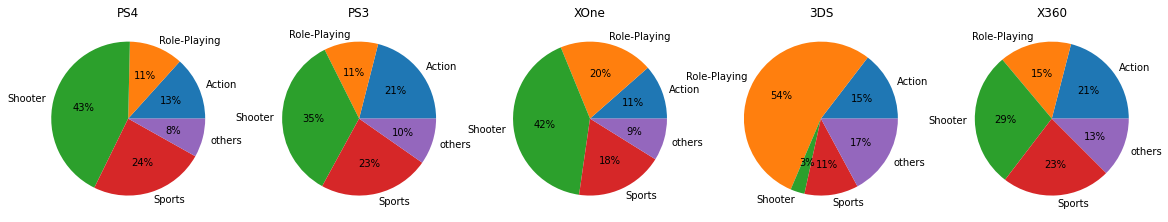

In [52]:
# Посмотрим процент продаж по платформам в первых четырех жанрах по популярным 5 платформам (90% процентов рынка)
fig, ax = plt.subplots(1,5,figsize=(20,5))

for i in range(len(first)):   
    n = first[i]
    tab = df_actual.query('platform==@n').copy()
    tab['genre1'] = tab['genre'].apply(group_ind, args=(['Action', 'Shooter', 'Sports', 'Role-Playing'],)) 
    y = tab.pivot_table(index = 'genre1', values = 'sum_sales')
    y.plot(ax=ax[i], y = 'sum_sales', kind = 'pie', autopct='%1.0f%%', labeldistance=1.1)
    #y.columns=['1']
    ax[i].legend().remove()
    ax[i].set_ylabel(None)
    ax[i].set_title(n)


In [53]:
#Построим медианные значения
df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending = False)

,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


(0.0, 1.5)

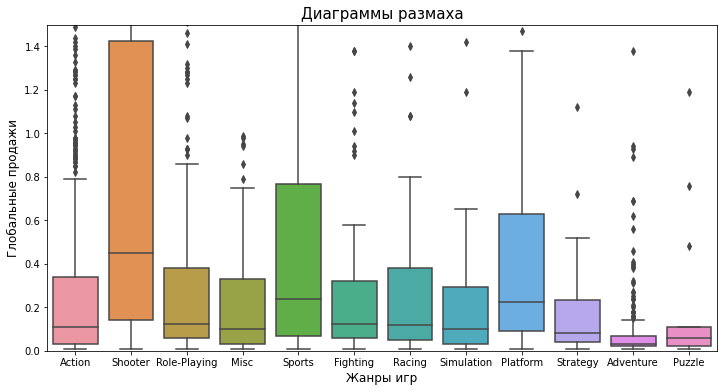

In [54]:
#Построим ящик с усами по продажам по жанрам
plt.figure(figsize=(12,6))
sns.boxplot(data=df_actual, x='genre', y='sum_sales')
plt.title('Диаграммы размаха', fontsize=15)
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim([-0,1.5])

Выводы по Шагу 3
 1. Платформы 'PS4', 'XOne', '3DS', 'X360', 'PS3' занимают больше 85 процентов рынка за период. 
 2. По лидерам продаж оценки критиков умеренно влияют на продажи. К ним можно прислушиваться. Влияния оценок пользователей не прослеживается.
 3. Самое больое медианное значение продаж по жанру игр "shooter". "Sports" на втором месте вместе с "Platform". Выигрывают платформы, которые выпускают большое количество игр в жанре "shooter" и "sports".
 4. Средний срок существования игровой платформы - окло 10 лет. Причем, в первые 4 -5 лет происходит взрывной рост, а потом такое же падение продаж



<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_4 Портрет пользователя каждого региона
</div>

В этом шаге определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). 
 - Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [56]:
# Объявим общие функции

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

    
def tables(t, column):
    head = 'Отчет по региону ' + column 
    print(colored(head, 'red'))
    plt.style.use('seaborn')
    df_s = pd.DataFrame()
    df_g = pd.DataFrame()
    df_r = pd.DataFrame()
    
    l1 = list(t.pivot_table(index = 'platform', values = column, aggfunc = ['sum']).set_axis([column], axis=1).sort_values(column, ascending = False).reset_index().rename_axis(None, axis=1).head(5)['platform'])
    for elem in range(len(l1)):
        p = l1[elem]
        df_s.loc[elem, 'Платформа'] = p
        df_s.loc[elem, 'Продажи'] = t.query('platform==@p')[column].sum()
        df_s.loc[elem, 'Процент от всех'] = t.query('platform==@p')[column].sum()/t[column].sum()

        
    l2 = list(t.pivot_table(index = 'genre', values = column, aggfunc = ['sum']).set_axis([column], axis=1).sort_values(column, ascending = False).reset_index().rename_axis(None, axis=1).head(5)['genre'])
    for elem in range(len(l2)):
        p = l2[elem]
        df_g.loc[elem, 'Жанр'] = p
        df_g.loc[elem, 'Продажи'] = t.query('genre==@p')[column].sum()
        df_g.loc[elem, 'Процент от всех'] = t.query('genre==@p')[column].sum()/t[column].sum()
    
    l3 = list(t.pivot_table(index = 'rating', values = column, aggfunc = ['sum']).set_axis([column], axis=1).sort_values(column, ascending = False).reset_index().rename_axis(None, axis=1).head(5)['rating'])
    for elem in range(len(l3)):
        p = l3[elem]
        df_r.loc[elem, 'Рейтинг'] = p
        df_r.loc[elem, 'Продажи'] = t.query('rating==@p')[column].sum()
        df_r.loc[elem, 'Процент от всех'] = t.query('rating==@p')[column].sum()/t[column].sum()
    
    display_side_by_side(df_s,df_g,df_r)
    
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    
    df_s.plot(ax=ax[0], y = 'Продажи', labels =  df_s['Платформа'] , kind = 'pie', autopct='%1.0f%%', labeldistance=1.1)
    ax[0].legend().remove()
    ax[0].set_ylabel(None)
    ax[0].set_title('Продажи по платформам')
    
    df_g.plot(ax=ax[1], y = 'Продажи', labels =  df_g['Жанр'],  kind = 'pie', autopct='%1.0f%%', labeldistance=1.1)
    ax[1].legend().remove()
    ax[1].set_ylabel(None)
    ax[1].set_title('Продажи по жанрам')
    
    df_r.plot(ax=ax[2], y = 'Продажи', labels =  df_r['Рейтинг'], kind = 'pie', autopct='%1.0f%%', labeldistance=1.1)
    ax[2].legend().remove()
    ax[2].set_ylabel(None)
    ax[2].set_title('Продажи по рейтингам')
    
    #ax[0].bar(df_s['Платформа'], df_s['Продажи'])
    #ax[1].bar(df_g['Жанр'], df_g['Продажи'])
    #ax[2].bar(df_r['Рейтинг'], df_r['Продажи'])
    #ax[0].set_title('Платформа')
    #ax[1].set_title('Жанр')
    #ax[2].set_title('Рейтинг')
                   
    plt.show()

Отчет по региону na_sales


,Платформа,Продажи,Процент от всех
0,PS4,108.74,0.248429
1,XOne,93.12,0.212744
2,X360,81.66,0.186562
3,PS3,63.50,0.145073
4,3DS,38.20,0.087272
,Жанр,Продажи,Процент от всех
0,Action,126.05,0.287976
1,Shooter,109.74,0.250714
2,Sports,65.27,0.149117
3,Role-Playing,46.40,0.106006


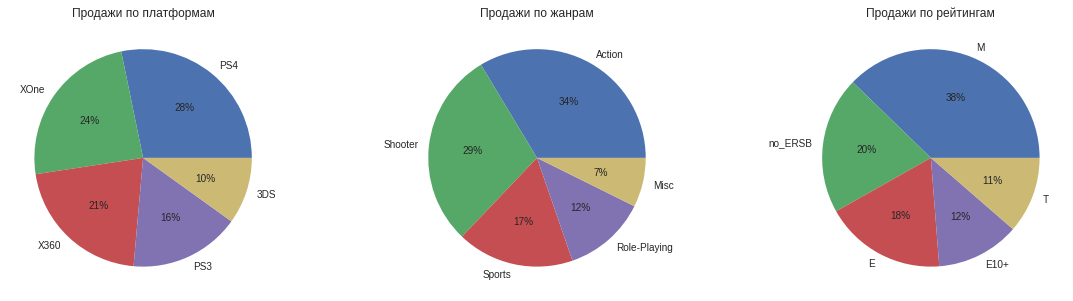

In [57]:
#Определим портреты пользователей по регионам

tables(df_actual,'na_sales')

Отчет по региону eu_sales


,Платформа,Продажи,Процент от всех
0,PS4,141.09,0.359712
1,PS3,67.81,0.172883
2,XOne,51.59,0.131530
3,X360,42.52,0.108406
4,3DS,30.96,0.078933
,Жанр,Продажи,Процент от всех
0,Action,118.13,0.301175
1,Shooter,87.86,0.224001
2,Sports,60.52,0.154297
3,Role-Playing,36.97,0.094256


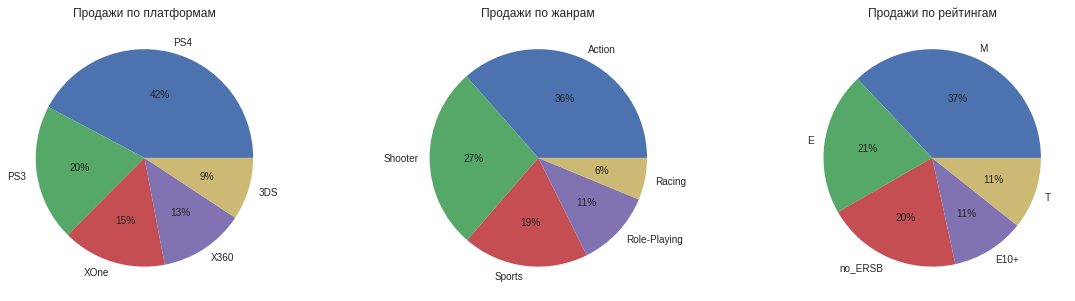

In [58]:
tables(df_actual,'eu_sales')

Отчет по региону jp_sales


,Платформа,Продажи,Процент от всех
0,3DS,67.81,0.481674
1,PS3,23.35,0.165862
2,PSV,18.59,0.132050
3,PS4,15.96,0.113368
4,WiiU,10.88,0.077284
,Жанр,Продажи,Процент от всех
0,Role-Playing,51.04,0.362551
1,Action,40.49,0.287612
2,Misc,9.20,0.065350
3,Fighting,7.65,0.054340


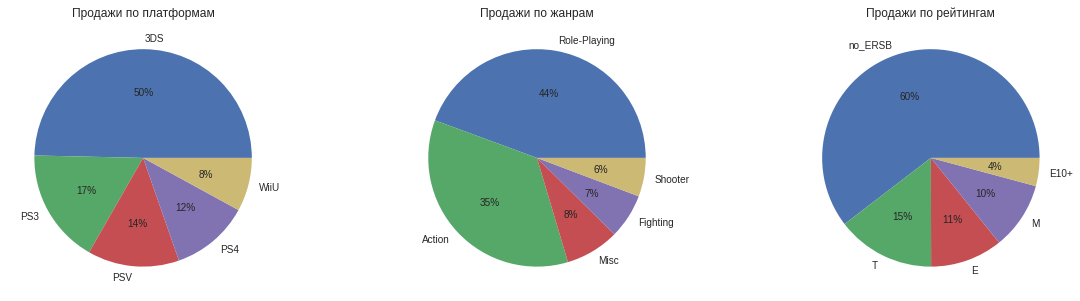

In [59]:
tables(df_actual,'jp_sales')

In [60]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_ERSB    6676
E          3921
T          2905
M          1536
E10+       1393
RP           13
Name: rating, dtype: int64

Выводы по шагу 4:
  - Если в Северной Америке и Европе предпочитают, в общем, схожие платформы (PS4, и в разных пропорциях XOne, PS3, X360), то в Японии предпочтительные платформы отличаются (DS, PS3)
  - Аналогичная ситуация по жанрам игр: в Северной Америке и Европе - Shooter и Action, в Японии Action и Role-Playing
  - По рейтингам, учитывая то, что все неизвестное мы обозвали no_ERSP, куда в итоге были включены все значения NAN, картина следующая:
    - По СА и Европе практически идентичная картина - 20% игр без рейтинга, а из оставшихся самые популярные игры для взрослых и игры для всех
    - В Японии, получается, что более 60% игр не имеют рейтинга, а из оставшихся  - игры для всех и для детей. Но, учитывая количество игр без рейтинга, нельзя ориентироваться на рейтинг по играм, продаваемым в Японии.
 

<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_5 Проверка гипотез
</div>

В этом шаге проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [62]:
#Посмотрим средние Xbox One и PC
#опять же, не учитываем те значения, где пользовательские рейтинги не установлены (=0), т.к. нет предмета вопроса. 
print('Средние Xone',df_actual.query('platform =="XOne"&user_score!=0')['user_score'].mean())
print('Средние PC',df_actual.query('platform =="PC"&user_score!=0')['user_score'].mean())


results = st.ttest_ind(df_actual.query('platform =="XOne"&user_score!=0')['user_score'], df_actual.query('platform =="PC"&user_score!=0')['user_score'], equal_var = False)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средние Xone 6.521428571428572
Средние PC 6.2696774193548395
0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: у нас вероятность получить одинаковые рейтинги почти 15%

Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [63]:
#Посмотрим средние жанров Action и Sports
#опять же, не учитываем те значения, где пользовательские рейтинги не установлены (=0), т.к. нет предмета вопроса. 
print('Средние Action',df_actual.query('genre =="Action"&user_score!=0')['user_score'].mean())
print('Средние Sports',df_actual.query('genre =="Sports"&user_score!=0')['user_score'].mean())


results = st.ttest_ind(df_actual.query('genre =="Action"&user_score!=0')['user_score'], df_actual.query('genre =="Sports"&user_score!=0')['user_score'], equal_var = False)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средние Action 6.837532133676092
Средние Sports 5.238124999999999
1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: вероятность получить одинаковые рейтинги меньше 5%

<div class="alert alert-success"; style="border-left: 7px solid green">
  Шаг_6 Общие выводы
</div>

- Мы исследовали базу игровых платформ за период с начала 80-х годов. Выявили, что средний срок жизни игровой платформы - около 10 лет. По всем игровым платформам наблюдается бурный рост с течение 3-4 лет, а потом столь же бурное затухание. 
- Для принятия решения о рекламном бюджете на 2017 год предположили, что данных за предыдушие 3 полных года будет достаточно. Анализировали исходя из сведений 2013-2016 гг.
- Выявили, что самые маржинальные платформы по миру в целом - PS4, PS3, XOne. Самый популярный жанр в целом по миру - это Shooter, с рейтингом игр - "Для взрослых" (М). Жанр "shooter" является самым высокодоходным, но в жанре "Action" самые большие продажи. Игры жанра "Action" тоже надо рассматривать, но исключително с хорошим рейтингом критиков.
- Однако, для региональных рынков есть свои особенности, которые стоит учесть:
  - Северная Америка и Европа весьма похожи в своих предпочтениях, в том время как Япония весьма существенно различается.
  - Для СА и Европы я бы рекомендовал сконцентрироваться на игровых платформах PS4, PS3, XOne, в жанрах Shooter и Action, с рейтингом "М".
  - По Японии популярные платформы 3DS и PS4. По жанрам - Shooter и Role-playing. По рейтингу сложно сказать, точно, т.к. рейтинг много где не установлен. Косвенно, можно порекомендовать рейтинг М (Shooter маловероятно, что будет с другим рейтингом).
- Можно не обращать внимание на рейтинги пользователей, т.к. зависимости продаж от оценок пользователей не обнаружилось. Но в части рейтингов критиков рекомендуется выбирать игры с хорошим рейтингом, т.к. небольшая, но все же связь между рейтингам критиков и продажами присутствует